In [10]:
import os
import numpy as np
import pandas as pd
import cv2
import random
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_dir = '../data/raw_data/traffic/traffic_Data/DATA/'
test_dir = '../data/raw_data/traffic/traffic_Data/TEST/'

# Calculate the number of classes and total images in the training directory
class_folders = [folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))]
num_classes = len(class_folders)

train_images = sum([len([f for f in os.listdir(os.path.join(train_dir, folder)) if f.endswith('.png')]) 
                    for folder in class_folders])

# Calculate the total number of images in the test directory
test_images = len([f for f in os.listdir(test_dir) if f.endswith('.png')])

# Print statistics
print("Number of classes in training data:", num_classes)
print("Total images in training data:", train_images)
print("Total images in test data:", test_images)
print("Total images in dataset:", train_images + test_images)


Number of classes in training data: 58
Total images in training data: 4170
Total images in test data: 1994
Total images in dataset: 6164


In [9]:
# Helper function to calculate statistics
def calculate_stats(filepath):
    data = cv2.imread(filepath)
    if data is None:
        print(f"Error reading file: {filepath}")
        return None
    stats = {
        'filename': os.path.basename(filepath),
        'shape': data.shape,
        'dtype': data.dtype,
        'min': np.min(data),
        'max': np.max(data),
        'mean': np.mean(data),
        'std': np.std(data),
        'has_nan': np.isnan(data).any(),
        'has_inf': np.isinf(data).any()
    }
    return stats

# Get 10 random files from train directory (with subfolders)
train_files = []
for folder in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, folder)
    if os.path.isdir(class_dir):
        files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.endswith('.png')]
        train_files.extend(files)

random_train_files = random.sample(train_files, min(10, len(train_files)))

# Get 10 random files from test directory
test_files = [os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith('.png')]
random_test_files = random.sample(test_files, min(10, len(test_files)))

# Print stats using tabulate
def display_stats_with_tabulate(stats_list, title):
    print(f"\n{title}")
    headers = stats_list[0].keys()  # Use dictionary keys as column headers
    rows = [list(stat.values()) for stat in stats_list]
    print(tabulate(rows, headers=headers, tablefmt="grid"))

# Train stats
print("Train File Stats:")
display_stats_with_tabulate(train_stats, "Train Stats")

# Test stats
print("\nTest File Stats:")
display_stats_with_tabulate(test_stats, "Test Stats")

Train File Stats:

Train Stats
+--------------------+---------------+---------+-------+-------+----------+---------+-----------+-----------+
| filename           | shape         | dtype   |   min |   max |     mean |     std |   has_nan |   has_inf |
+====================+===============+=========+=======+=======+==========+=========+===========+===========+
| 007_0002.png       | (102, 111, 3) | uint8   |     8 |   175 |  95.8855 | 37.6227 |         0 |         0 |
+--------------------+---------------+---------+-------+-------+----------+---------+-----------+-----------+
| 005_1_0045.png     | (98, 107, 3)  | uint8   |    12 |   255 |  84.7403 | 55.0262 |         0 |         0 |
+--------------------+---------------+---------+-------+-------+----------+---------+-----------+-----------+
| 055_1_0009.png     | (155, 173, 3) | uint8   |    10 |   255 |  81.5018 | 57.0536 |         0 |         0 |
+--------------------+---------------+---------+-------+-------+----------+---------+----

C:\Users\m3sht\AppData\Local\Temp\ipykernel_35876\4268766559.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


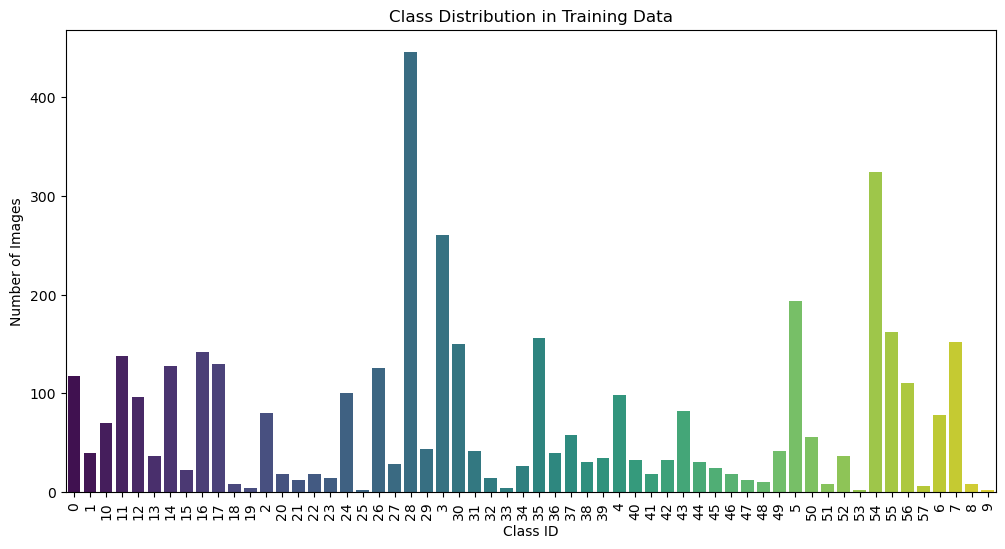

In [15]:
# Count images per class in the train directory
class_counts = {folder: len([f for f in os.listdir(os.path.join(train_dir, folder)) if f.endswith('.png')]) 
                for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))}

# Plot class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.title("Class Distribution in Training Data")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.xticks(rotation=90)
plt.show()


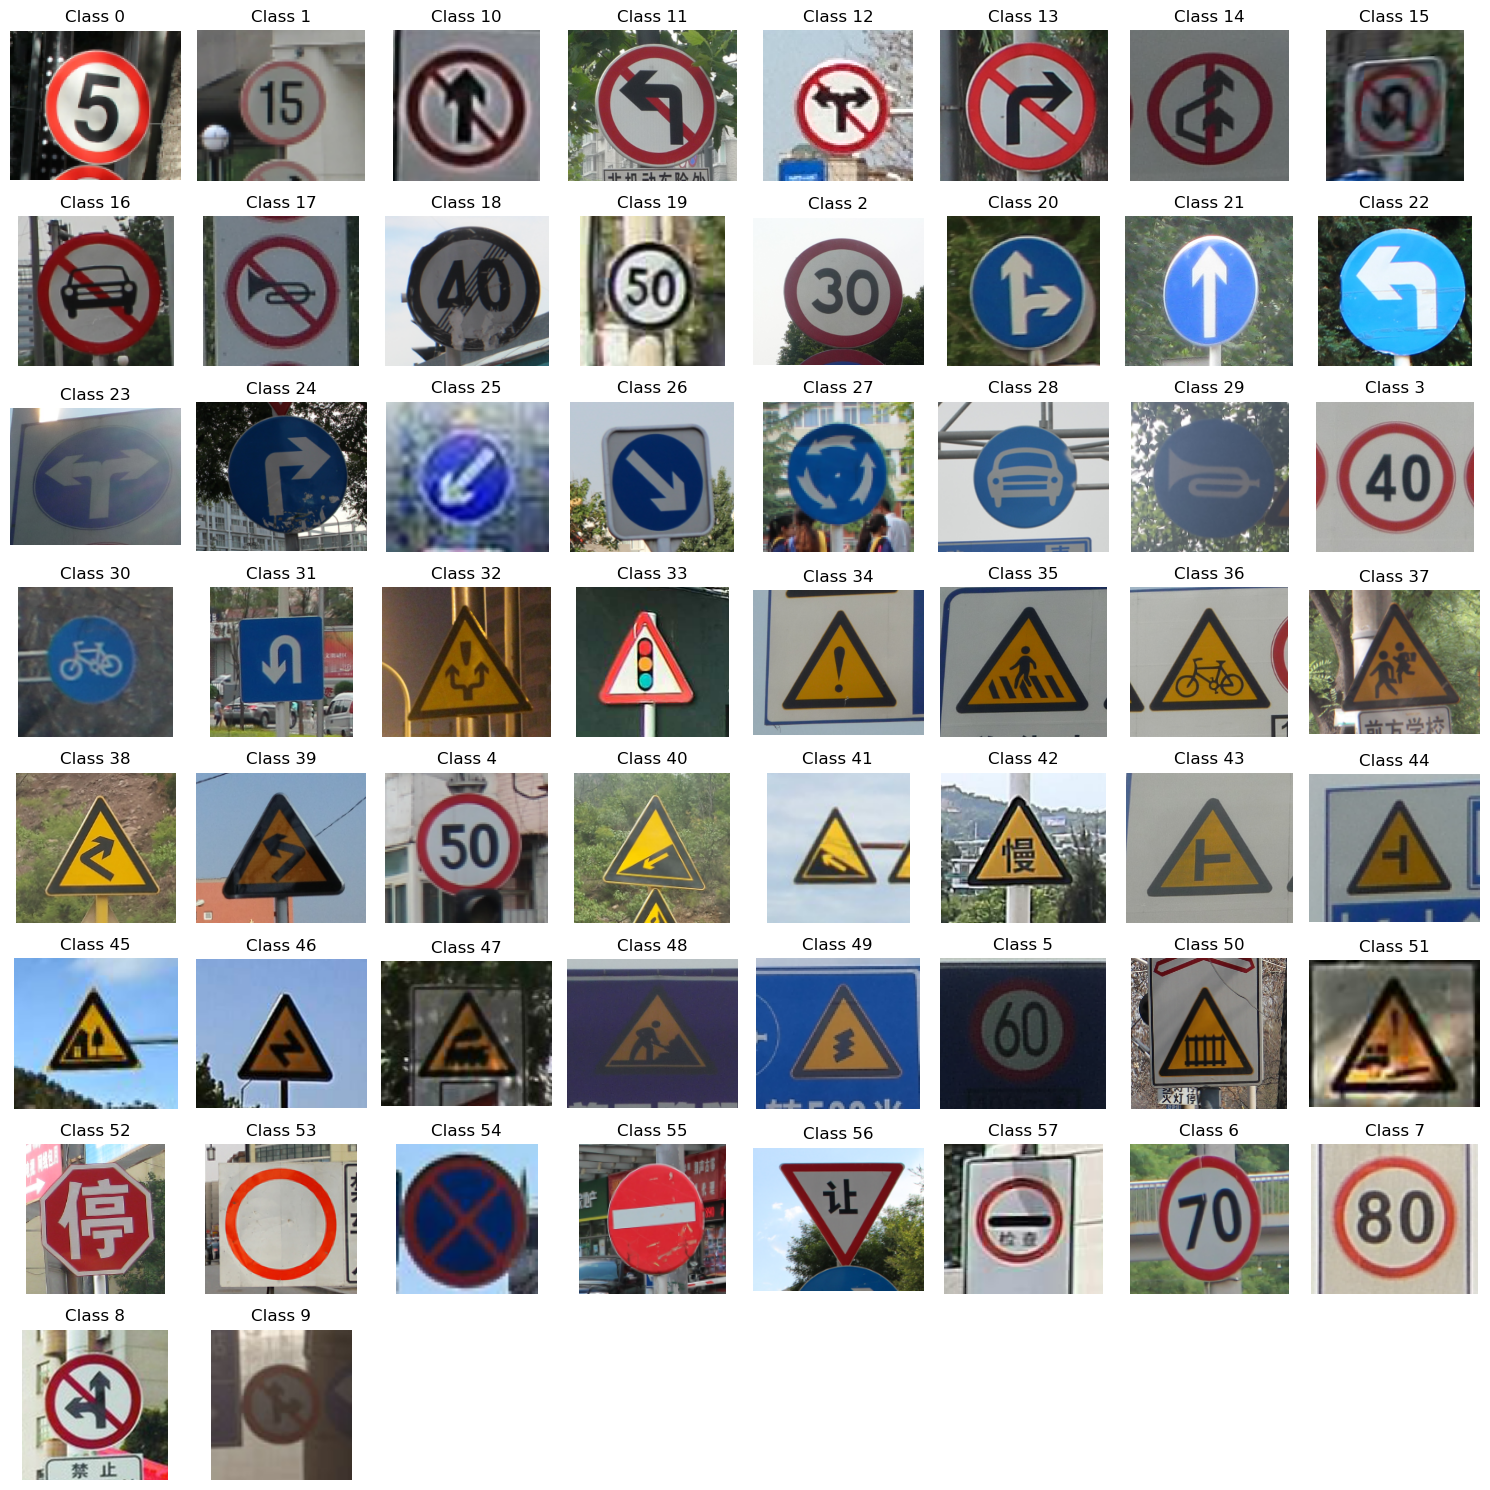

In [16]:
plt.figure(figsize=(15, 15))
num_classes = len(class_counts)
columns = 8
rows = (num_classes // columns) + 1

for i, class_id in enumerate(class_counts.keys()):
    class_dir = os.path.join(train_dir, class_id)
    sample_file = random.choice([f for f in os.listdir(class_dir) if f.endswith('.png')])
    sample_path = os.path.join(class_dir, sample_file)
    img = cv2.imread(sample_path)[:, :, ::-1]  # Convert BGR to RGB
    plt.subplot(rows, columns, i + 1)
    plt.imshow(img)
    plt.title(f"Class {class_id}")
    plt.axis("off")

plt.tight_layout()
plt.show()

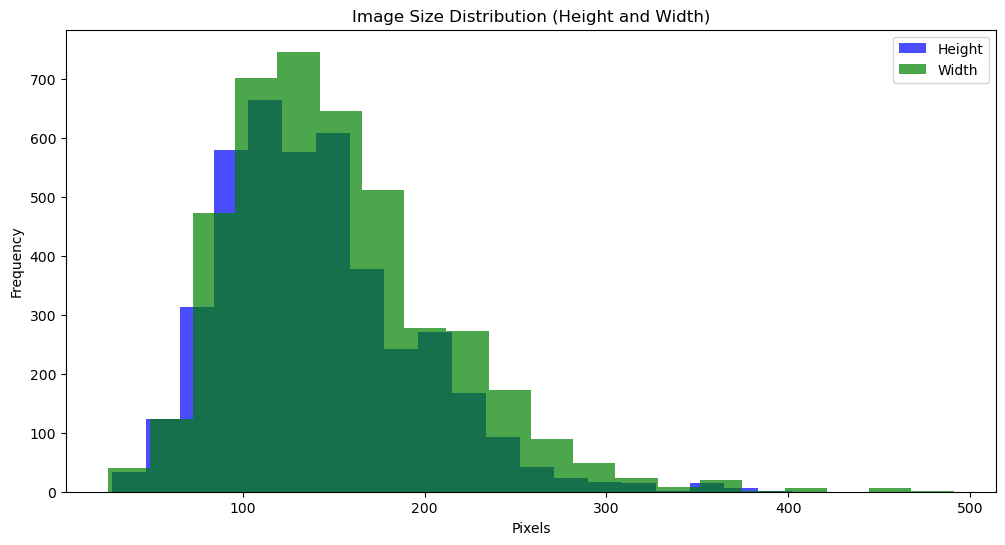

In [17]:
image_sizes = []
for folder in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, folder)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                image_sizes.append(img.shape[:2])  # (height, width)

# Extract heights and widths
heights, widths = zip(*image_sizes)

# Plot image size distribution
plt.figure(figsize=(12, 6))
plt.hist(heights, bins=20, alpha=0.7, label="Height", color='blue')
plt.hist(widths, bins=20, alpha=0.7, label="Width", color='green')
plt.title("Image Size Distribution (Height and Width)")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.legend()
plt.show()
